In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("attacks.csv", encoding='latin-1')

In [3]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
df['Sex '].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

In [7]:
df['Activity'].value_counts()[:30]

Surfing            971
Swimming           869
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Treading water      32
Pearl diving        32
Fell overboard      32
Free diving         29
Boogie boarding     29
Windsurfing         19
Walking             17
Boogie Boarding     16
Shark fishing       15
Floating            14
Fishing             13
Canoeing            13
Surf skiing         12
Surf fishing        12
Surf-skiing         12
Rowing              12
Name: Activity, dtype: int64

In [8]:
df['Area'].value_counts()[:30]

Florida                  1037
New South Wales           486
Queensland                311
Hawaii                    298
California                290
KwaZulu-Natal             213
Western Cape Province     195
Western Australia         189
Eastern Cape Province     160
South Carolina            160
South Australia           104
North Carolina            101
Victoria                   90
Pernambuco                 74
Texas                      73
Torres Strait              70
North Island               67
New Jersey                 52
Tasmania                   41
South Island               40
New York                   30
Oregon                     29
Abaco Islands              23
Northern Territory         23
Central Province           22
Havana Province            19
Virginia                   19
South Province             17
Gaza                       16
Massachusetts              16
Name: Area, dtype: int64

# Data Cleaning

In [9]:
df = df.drop(['Unnamed: 23', 'Unnamed: 22', 'original order', 'Case Number.2', 'Case Number.1', 'href', 'href formula', 'pdf', 'Investigator or Source', 'Case Number', 'Location',
             'Name', 'Date', 'Injury', 'Species '], axis=1)

In [10]:
df = df.dropna()

In [11]:
df['Fatal (Y/N)'].value_counts()

N          1782
Y           384
 N            3
UNKNOWN       2
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [12]:
df.columns

Index(['Year', 'Type', 'Country', 'Area', 'Activity', 'Sex ', 'Age',
       'Fatal (Y/N)', 'Time'],
      dtype='object')

In [13]:
df

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time
0,2018.0,Boating,USA,California,Paddling,F,57,N,18h00
1,2018.0,Unprovoked,USA,Georgia,Standing,F,11,N,14h00 -15h00
2,2018.0,Invalid,USA,Hawaii,Surfing,M,48,N,07h45
6,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming,M,18,Y,Late afternoon
8,2018.0,Unprovoked,USA,Florida,Walking,M,15,N,17h00
...,...,...,...,...,...,...,...,...,...
6200,0.0,Unprovoked,USA,Florida,Shark tagging,F,21,N,18h00
6241,0.0,Unprovoked,IRAQ,Basrah,Fishing from a small boat & put his hand in th...,M,25,N,Afternoon
6242,0.0,Unprovoked,IRAQ,Basrah,Swimming naked near a date palm where many dat...,M,6,N,Afternoon
6243,0.0,Unprovoked,IRAQ,Basrah,Swimming in section of river used for washing ...,M,16,N,Afternoon


<AxesSubplot:>

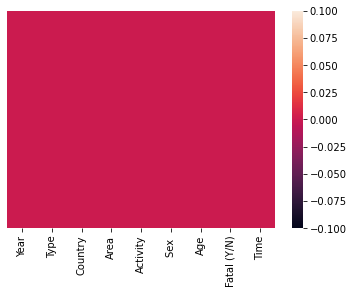

In [14]:
sns.heatmap(df.isnull(), yticklabels=False)

In [15]:
df['Sex '].replace('M ', 'M', inplace=True)

In [16]:
df[df['Sex '] == 'lli']

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time
1624,2004.0,Unprovoked,USA,California,Surfing,lli,38,N,13h30


In [17]:
df.drop(1624, inplace=True)

## Fixing the time

In [18]:
df['Time']

0                18h00
1        14h00  -15h00
2                07h45
6       Late afternoon
8                17h00
             ...      
6200             18h00
6241         Afternoon
6242         Afternoon
6243         Afternoon
6265         Afternoon
Name: Time, Length: 2172, dtype: object

In [19]:
def fix_time(time):
    hrs = time[:2]
    if(hrs.isdigit()):
        hrs = int(hrs)
        if(hrs < 12 and hrs > 6):
            T = 'Morning'
        elif(hrs >= 12 and hrs < 17):
            T = 'Afternoon'
        elif(hrs >= 17 and hrs < 22):
            T = 'Evening'
        else:
            T = 'Night'            
        return T
    else:
        return time

In [20]:
df['Time'] = df['Time'].apply(fix_time)

In [21]:
df['Time'].value_counts()

Afternoon                                                                1022
Morning                                                                   620
Evening                                                                   336
Night                                                                      75
Late afternoon                                                             27
Dusk                                                                        9
A.M.                                                                        8
Early afternoon                                                             7
P.M.                                                                        6
Midday                                                                      5
Early morning                                                               4
--                                                                          3
Sunset                                                          

In [22]:
df['Time'].replace({'Late afternoon': 'Afternoon', 'Dusk':'Evening', 'A.M.':'Morning', 'P.M.':'Night', 'Early morning':'Morning'}, inplace=True)

In [23]:
df['Time'].replace({'Sunset':'Evening', 'After noon':'Afternoon', 'Just before noon':'Morning', 'Nightfall':'Night', 'Just before dawn':'Evening', 'AM':'Morning'}, inplace=True)

In [24]:
df['Time'].replace({'Prior to 10h37':'Morning','Daybreak':'Afternoon','"Early evening"':'Evening', 'AM':'Morning' , 'Between 06h00 & 07h20':'Morning', 'Mid-morning':'Morning', 'Daytime':'Morning'}, inplace=True)

In [25]:
df['Time'].replace({' 14h00':'Afternoon', 'After midnight':'Night', 'Midnight':'Night','>06h45':'Morning', '"After dark"':'Night', 'After 04h00':'Morning', 'Late afternon':'Afternoon'}, inplace=True)

In [26]:
df['Time'].replace({'After dusk':'Night', 'Mid morning':'Morning', 'night':'Night', 'Late morning':'Morning', '"Night"':'Night'}, inplace=True)

In [27]:
df['Time'].replace({'Before 10h30':'Morning','8:04 pm':'Evening','Shortly before 13h00':'Afternoon','Shortly after midnight':'Night','Early Morning':'Morning','Just after 12h00':'Afternoon','>08h00':'Morning','Just before sundown':'Afternoon','"Evening"':'Evening','"Just before 11h00"':'Morning','Before 07h00':'Morning','Dawn':'Morning','Sometime between 06h00 & 08hoo':'Morning'}, inplace=True)

In [28]:
df['Time'].replace({'9h00':'Morning','Shortly before 12h00':'Morning'}, inplace=True)

In [29]:
df['Time'].replace({'Early afternoon':'Afternoon', 'Midday':'Afternoon', 'Morning  ':'Morning'}, inplace=True)

In [30]:
df.drop(df[(df['Time'] != 'Afternoon') & (df['Time'] != 'Morning') & (df['Time'] != 'Evening') & (df['Time'] != 'Night')].index, inplace=True)

In [31]:
df['Time'].value_counts()

Afternoon    1069
Morning       652
Evening       352
Night          89
Name: Time, dtype: int64

## Reducing the number of countries and activities ( as we need only few)

In [32]:
df['Type'].value_counts()

Unprovoked      1998
Provoked         123
Boating           19
Sea Disaster      15
Invalid            7
Name: Type, dtype: int64

In [33]:
df['Country'].value_counts()[:30]

USA                 1075
AUSTRALIA            434
SOUTH AFRICA         283
BAHAMAS               35
REUNION               29
BRAZIL                28
NEW ZEALAND           26
MEXICO                22
PAPUA NEW GUINEA      16
MOZAMBIQUE            16
NEW CALEDONIA         15
FIJI                  14
EGYPT                 10
IRAQ                   9
FRENCH POLYNESIA       9
ITALY                  7
JAPAN                  7
PANAMA                 5
TONGA                  5
CUBA                   5
INDONESIA              4
VIETNAM                4
HONG KONG              4
TAIWAN                 4
PHILIPPINES            4
SPAIN                  4
CROATIA                4
GRENADA                3
JAMAICA                3
VANUATU                3
Name: Country, dtype: int64

In [34]:
df['Activity'].value_counts()[:30]

Surfing                           608
Swimming                          349
Spearfishing                      124
Wading                             91
Standing                           63
Fishing                            55
Snorkeling                         52
Body boarding                      47
Body surfing                       37
Treading water                     27
Scuba diving                       26
Swimming                           24
Bathing                            23
Diving                             22
Boogie boarding                    20
Kayaking                           14
Walking                            13
Boogie Boarding                    12
Windsurfing                        11
Free diving                        11
Floating                            8
Free diving for abalone             7
Surf skiing                         6
Paddle boarding                     6
Surf-skiing                         5
Playing                             5
Surfing (sit

In [35]:
activity = ['Surfing',
'Swimming',
'Spearfishing',
'Wading',
'Standing',
'Fishing',
'Snorkeling',
'Body boarding',
'Body surfing',
'Treading water',
'Scuba diving',
'Swimming',
'Bathing',
'Diving',
'Boogie boarding',
'Kayaking',
'Walking',
'Boogie Boarding',
'Windsurfing',
'Free diving']

In [36]:
Country = ['USA',
'AUSTRALIA',
'SOUTH AFRICA',
'BAHAMAS',
'REUNION',
'BRAZIL',
'NEW ZEALAND',
'MEXICO',
'PAPUA NEW GUINEA',
'MOZAMBIQUE',
'NEW CALEDONIA',
'FIJI',
'EGYPT',]

In [37]:
df.drop(df[~df['Country'].isin(Country)].index, inplace=True)

In [38]:
df.drop(df[~df['Activity'].isin(activity)].index, inplace=True)

In [39]:
df

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time
1,2018.0,Unprovoked,USA,Georgia,Standing,F,11,N,Afternoon
2,2018.0,Invalid,USA,Hawaii,Surfing,M,48,N,Morning
6,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming,M,18,Y,Afternoon
8,2018.0,Unprovoked,USA,Florida,Walking,M,15,N,Evening
9,2018.0,Unprovoked,USA,Florida,Standing,M,12,N,Afternoon
...,...,...,...,...,...,...,...,...,...
5814,1880.0,Unprovoked,AUSTRALIA,Queensland,Swimming,M,12,Y,Afternoon
5844,1878.0,Unprovoked,USA,New York,Swimming,M,14,Y,Afternoon
5958,1863.0,Unprovoked,AUSTRALIA,New South Wales,Bathing,M,17,Y,Evening
5963,1862.0,Unprovoked,NEW ZEALAND,North Island,Swimming,M,28,N,Night


In [40]:
df.drop(df[~df['Age'].str.isnumeric()].index, inplace=True)

In [41]:
df['Fatal (Y/N)'].replace({' N':'N'}, inplace=True)

In [42]:
df.drop(df[df['Fatal (Y/N)'] == 'UNKNOWN'].index, inplace=True)

In [43]:
df.drop('Type', axis=1, inplace=True)

In [44]:
df.drop('Year', axis=1, inplace=True)

In [45]:
df = df.rename({'Sex ': 'Sex'}, axis=1)

In [46]:
df['Sex']

1       F
2       M
6       M
8       M
9       M
       ..
5814    M
5844    M
5958    M
5963    M
5991    M
Name: Sex, Length: 1470, dtype: object

# Data Preparation

In [47]:
df

,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time
1,USA,Georgia,Standing,F,11,N,Afternoon
2,USA,Hawaii,Surfing,M,48,N,Morning
6,BRAZIL,Pernambuco,Swimming,M,18,Y,Afternoon
8,USA,Florida,Walking,M,15,N,Evening
9,USA,Florida,Standing,M,12,N,Afternoon
...,...,...,...,...,...,...,...
5814,AUSTRALIA,Queensland,Swimming,M,12,Y,Afternoon
5844,USA,New York,Swimming,M,14,Y,Afternoon
5958,AUSTRALIA,New South Wales,Bathing,M,17,Y,Evening
5963,NEW ZEALAND,North Island,Swimming,M,28,N,Night


In [48]:
df['Fatal (Y/N)'].replace({"N":0, "Y":1}, inplace=True)

In [49]:
df['Fatal (Y/N)'].value_counts()

0    1262
1     208
Name: Fatal (Y/N), dtype: int64

In [50]:
mean_country = df.groupby('Country')['Fatal (Y/N)'].mean().to_dict()
mean_country

{'AUSTRALIA': 0.2727272727272727,
 'BAHAMAS': 0.07692307692307693,
 'BRAZIL': 0.36,
 'EGYPT': 0.25,
 'FIJI': 0.3,
 'MEXICO': 0.5,
 'MOZAMBIQUE': 0.18181818181818182,
 'NEW CALEDONIA': 0.4,
 'NEW ZEALAND': 0.1875,
 'PAPUA NEW GUINEA': 0.5,
 'REUNION': 0.46153846153846156,
 'SOUTH AFRICA': 0.20465116279069767,
 'USA': 0.040100250626566414}

In [51]:
mean_area = df.groupby('Area')['Fatal (Y/N)'].mean().to_dict()
mean_area

{' Lau Province': 0.0,
 ' Loyalty Islands': 0.0,
 '10ºS, 142ºE': 0.0,
 'Abaco Islands': 0.08333333333333333,
 'Alabama': 0.0,
 'Andros Islands': 0.0,
 'Baja California': 0.0,
 'Baja California Sur': 1.0,
 'Berry Islands': 0.0,
 'Bimini Islands': 0.0,
 'California': 0.10526315789473684,
 'Cat Cay': 0.0,
 'Central Province': 0.0,
 'Connecticut': 0.0,
 'Conservatória District': 0.0,
 'Delaware': 0.0,
 'Eastern Cape  Province': 0.0,
 'Eastern Cape Province': 0.15492957746478872,
 'Exuma Islands': 0.0,
 'Fernando de Noronha': 0.0,
 'Florida': 0.010224948875255624,
 'Gaza': 0.25,
 'Georgia': 0.0,
 'Grand Bahama Island': 0.0,
 'Grand Terre': 1.0,
 "Grand'Anse": 0.0,
 'Guerrero': 0.75,
 'Guerro': 0.5,
 'Hawaii': 0.08974358974358974,
 'Inhambane Province': 0.0,
 'Johnston Atoll': 0.0,
 'Kadavu': 0.0,
 'KwaZulu-Natal': 0.25316455696202533,
 "L'Etang-Salé": 0.0,
 'Le Port': 0.0,
 'Lomaiviti  Island Group': 0.0,
 'Lomaloma, Lau': 0.0,
 'Louisiana': 0.0,
 'Loyalty Islands': 1.0,
 'Madang': 1.0,
 'M

In [52]:
mean_activity = df.groupby('Activity')['Fatal (Y/N)'].mean().to_dict()
mean_activity

{'Bathing': 0.55,
 'Body boarding': 0.2826086956521739,
 'Body surfing': 0.16216216216216217,
 'Boogie Boarding': 0.08333333333333333,
 'Boogie boarding': 0.05,
 'Diving': 0.26666666666666666,
 'Fishing': 0.022727272727272728,
 'Free diving': 0.1,
 'Kayaking': 0.07692307692307693,
 'Scuba diving': 0.3,
 'Snorkeling': 0.1956521739130435,
 'Spearfishing': 0.1574074074074074,
 'Standing': 0.0847457627118644,
 'Surfing': 0.05641025641025641,
 'Swimming': 0.2757475083056478,
 'Treading water': 0.23076923076923078,
 'Wading': 0.07142857142857142,
 'Walking': 0.07692307692307693,
 'Windsurfing': 0.2727272727272727}

In [53]:
df['Fatal (Y/N)'].mean()

0.1414965986394558

## One hot encoding sex column

In [54]:
df = pd.get_dummies(df, columns = ['Sex'])

In [55]:
df

,Country,Area,Activity,Age,Fatal (Y/N),Time,Sex_F,Sex_M
1,USA,Georgia,Standing,11,0,Afternoon,1,0
2,USA,Hawaii,Surfing,48,0,Morning,0,1
6,BRAZIL,Pernambuco,Swimming,18,1,Afternoon,0,1
8,USA,Florida,Walking,15,0,Evening,0,1
9,USA,Florida,Standing,12,0,Afternoon,0,1
...,...,...,...,...,...,...,...,...
5814,AUSTRALIA,Queensland,Swimming,12,1,Afternoon,0,1
5844,USA,New York,Swimming,14,1,Afternoon,0,1
5958,AUSTRALIA,New South Wales,Bathing,17,1,Evening,0,1
5963,NEW ZEALAND,North Island,Swimming,28,0,Night,0,1


## Target Encoding Country column

In [56]:
import category_encoders as ce

In [57]:
y = df['Fatal (Y/N)']

In [58]:
y

1       0
2       0
6       1
8       0
9       0
       ..
5814    1
5844    1
5958    1
5963    0
5991    1
Name: Fatal (Y/N), Length: 1470, dtype: int64

In [59]:
X = df.drop('Fatal (Y/N)', axis=1)

In [60]:
X

,Country,Area,Activity,Age,Time,Sex_F,Sex_M
1,USA,Georgia,Standing,11,Afternoon,1,0
2,USA,Hawaii,Surfing,48,Morning,0,1
6,BRAZIL,Pernambuco,Swimming,18,Afternoon,0,1
8,USA,Florida,Walking,15,Evening,0,1
9,USA,Florida,Standing,12,Afternoon,0,1
...,...,...,...,...,...,...,...
5814,AUSTRALIA,Queensland,Swimming,12,Afternoon,0,1
5844,USA,New York,Swimming,14,Afternoon,0,1
5958,AUSTRALIA,New South Wales,Bathing,17,Evening,0,1
5963,NEW ZEALAND,North Island,Swimming,28,Night,0,1


In [61]:
country_encoder = ce.TargetEncoder(cols='Country')
df1 = country_encoder.fit_transform(df['Country'], df['Fatal (Y/N)'])
df1

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Country
1,0.040100
2,0.040100
6,0.360000
8,0.040100
9,0.040100
...,...
5814,0.272727
5844,0.040100
5958,0.272727
5963,0.187500


In [62]:
X['Country'] = df1
X

,Country,Area,Activity,Age,Time,Sex_F,Sex_M
1,0.040100,Georgia,Standing,11,Afternoon,1,0
2,0.040100,Hawaii,Surfing,48,Morning,0,1
6,0.360000,Pernambuco,Swimming,18,Afternoon,0,1
8,0.040100,Florida,Walking,15,Evening,0,1
9,0.040100,Florida,Standing,12,Afternoon,0,1
...,...,...,...,...,...,...,...
5814,0.272727,Queensland,Swimming,12,Afternoon,0,1
5844,0.040100,New York,Swimming,14,Afternoon,0,1
5958,0.272727,New South Wales,Bathing,17,Evening,0,1
5963,0.187500,North Island,Swimming,28,Night,0,1


In [63]:
country_encoder.get_params()

{'cols': ['Country'],
 'drop_invariant': False,
 'handle_missing': 'value',
 'handle_unknown': 'value',
 'min_samples_leaf': 1,
 'return_df': True,
 'smoothing': 1.0,
 'verbose': 0}

In [64]:
country_encoder.mapping

{'Country': Country
  1     0.040100
  2     0.360000
  3     0.272727
  4     0.204651
  5     0.076923
  6     0.500000
  7     0.461538
  8     0.249901
  9     0.187500
  10    0.399968
  11    0.181816
  12    0.299980
  13    0.499956
 -1     0.141497
 -2     0.141497
 dtype: float64}

In [65]:
df['Country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'SOUTH AFRICA', 'BAHAMAS', 'MEXICO',
       'REUNION', 'EGYPT', 'NEW ZEALAND', 'NEW CALEDONIA', 'MOZAMBIQUE',
       'FIJI', 'PAPUA NEW GUINEA'], dtype=object)

In [66]:
df1['Country'].unique()

array([0.04010025, 0.36      , 0.27272727, 0.20465116, 0.07692308,
       0.49999999, 0.46153846, 0.24990115, 0.18749999, 0.3999681 ,
       0.18181635, 0.29998044, 0.49995576])

In [67]:
country_encoding = {'USA' : 0.04010025,'BRAZIL': 0.36,'AUSTRALIA': 0.27272727, 'SOUTH AFRICA': 0.20465116, 'BAHAMAS' : 0.07692308, 'MEXICO' :0.49999999, 
 'REUNION' : 0.46153846,'EGYPT' :  0.24990115,'NEW ZEALAND' :  0.18749999,'NEW CALEDONIA' :  0.3999681 , 'MOZAMBIQUE' : 0.18181635,
 'FIJI' : 0.29998044,'PAPUA NEW GUINEA':  0.49995576}

## one hot encoding time

In [68]:
X = pd.get_dummies(X, columns = ['Time'])

In [69]:
X

,Country,Area,Activity,Age,Sex_F,Sex_M,Time_Afternoon,Time_Evening,Time_Morning,Time_Night
1,0.040100,Georgia,Standing,11,1,0,1,0,0,0
2,0.040100,Hawaii,Surfing,48,0,1,0,0,1,0
6,0.360000,Pernambuco,Swimming,18,0,1,1,0,0,0
8,0.040100,Florida,Walking,15,0,1,0,1,0,0
9,0.040100,Florida,Standing,12,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5814,0.272727,Queensland,Swimming,12,0,1,1,0,0,0
5844,0.040100,New York,Swimming,14,0,1,1,0,0,0
5958,0.272727,New South Wales,Bathing,17,0,1,0,1,0,0
5963,0.187500,North Island,Swimming,28,0,1,0,0,0,1


## Target Encoding Activity column

In [70]:
Activity_encoder = ce.TargetEncoder(cols='Activity')
df2 = Activity_encoder.fit_transform(df['Activity'], df['Fatal (Y/N)'])
df2

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Activity
1,0.084746
2,0.056410
6,0.275748
8,0.076923
9,0.084746
...,...
5814,0.275748
5844,0.275748
5958,0.550000
5963,0.275748


In [71]:
X['Activity'] = df2

In [72]:
X

,Country,Area,Activity,Age,Sex_F,Sex_M,Time_Afternoon,Time_Evening,Time_Morning,Time_Night
1,0.040100,Georgia,0.084746,11,1,0,1,0,0,0
2,0.040100,Hawaii,0.056410,48,0,1,0,0,1,0
6,0.360000,Pernambuco,0.275748,18,0,1,1,0,0,0
8,0.040100,Florida,0.076923,15,0,1,0,1,0,0
9,0.040100,Florida,0.084746,12,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5814,0.272727,Queensland,0.275748,12,0,1,1,0,0,0
5844,0.040100,New York,0.275748,14,0,1,1,0,0,0
5958,0.272727,New South Wales,0.550000,17,0,1,0,1,0,0
5963,0.187500,North Island,0.275748,28,0,1,0,0,0,1


In [73]:
y

1       0
2       0
6       1
8       0
9       0
       ..
5814    1
5844    1
5958    1
5963    0
5991    1
Name: Fatal (Y/N), Length: 1470, dtype: int64

In [74]:
Activity_encoder.mapping

{'Activity': Activity
  1     0.084746
  2     0.056410
  3     0.275748
  4     0.076923
  5     0.071429
  6     0.157407
  7     0.195652
  8     0.022727
  9     0.076923
  10    0.282609
  11    0.100005
  12    0.050000
  13    0.266667
  14    0.162162
  15    0.272721
  16    0.083334
  17    0.300000
  18    0.230769
  19    0.550000
 -1     0.141497
 -2     0.141497
 dtype: float64}

In [75]:
df['Activity'].unique()

array(['Standing', 'Surfing', 'Swimming', 'Walking', 'Wading',
       'Spearfishing', 'Snorkeling', 'Fishing', 'Kayaking',
       'Body boarding', 'Free diving', 'Boogie boarding', 'Diving',
       'Body surfing', 'Windsurfing', 'Boogie Boarding', 'Scuba diving',
       'Treading water', 'Bathing'], dtype=object)

In [76]:
df2['Activity'].unique()

array([0.08474576, 0.05641026, 0.27574751, 0.07692347, 0.07142857,
       0.15740741, 0.19565217, 0.02272727, 0.2826087 , 0.10000512,
       0.05      , 0.26666656, 0.16216216, 0.27272132, 0.0833343 ,
       0.3       , 0.23076923, 0.55      ])

In [77]:
activity_encoding = {'Standing':0.08474576, 'Surfing':0.05641026, 'Swimming': 0.27574751, 'Walking': 0.07692347, 'Wading':0.07142857,
       'Spearfishing': 0.15740741, 'Snorkeling': 0.19565217, 'Fishing': 0.02272727, 'Kayaking': 0.2826087 ,
       'Body boarding': 0.10000512 , 'Free diving': 0.05, 'Boogie boarding': 0.26666656, 'Diving': 0.16216216,
       'Body surfing': 0.27272132, 'Windsurfing': 0.0833343, 'Boogie Boarding': 0.3 , 'Scuba diving': 0.23076923,
       'Treading water': 0.55, 'Bathing': 0.14149755}

In [78]:
X = X.drop(['Area'], axis=1)

## Model Training

In [79]:
X['Age'].replace({'6½':'6'}, inplace=True)

In [80]:
X['Age'].unique()

array(['11', '48', '18', '15', '12', '10', '60', '37', '19', '69', '55',
       '35', '20', '54', '25', '14', '31', '40', '28', '17', '3', '13',
       '34', '46', '32', '33', '21', '51', '58', '30', '26', '22', '57',
       '47', '16', '61', '65', '73', '41', '42', '36', '66', '29', '43',
       '49', '9', '59', '64', '23', '52', '39', '45', '44', '7', '27',
       '38', '68', '6', '63', '70', '50', '53', '8', '24', '56', '86',
       '77', '84', '62', '5', '75'], dtype=object)

In [81]:
X['Age'] = pd.to_numeric(X['Age'])

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 5991
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1470 non-null   float64
 1   Activity        1470 non-null   float64
 2   Age             1470 non-null   int64  
 3   Sex_F           1470 non-null   uint8  
 4   Sex_M           1470 non-null   uint8  
 5   Time_Afternoon  1470 non-null   uint8  
 6   Time_Evening    1470 non-null   uint8  
 7   Time_Morning    1470 non-null   uint8  
 8   Time_Night      1470 non-null   uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 86.8 KB


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [86]:
clf_LogReg = LogisticRegression()
clf_LogReg.fit(X_train, y_train)

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
pred_LogReg = clf_LogReg.predict(X_test)
print(accuracy_score(y_test, pred_LogReg))

0.8600823045267489


In [88]:
confusion_matrix(y_test, pred_LogReg)

array([[413,  10],
       [ 58,   5]], dtype=int64)

In [89]:
(y_test == 1).sum()

63

## decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
clf_DecTree = DecisionTreeClassifier()
clf_DecTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
pred_DecTree = clf_DecTree.predict(X_test)
print(accuracy_score(y_test, pred_DecTree))

0.8209876543209876


In [93]:
confusion_matrix(y_test, pred_DecTree)

array([[378,  45],
       [ 42,  21]], dtype=int64)

## Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
pred_RF = clf_RF.predict(X_test)
print(accuracy_score(y_test, pred_RF))

0.8497942386831275


In [97]:
confusion_matrix(y_test, pred_RF)

array([[395,  28],
       [ 45,  18]], dtype=int64)

## SMOTE

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
y.value_counts()

0    1262
1     208
Name: Fatal (Y/N), dtype: int64

In [102]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [103]:
y_train_res.value_counts()

0    839
1    839
Name: Fatal (Y/N), dtype: int64

In [104]:
clf1 = RandomForestClassifier()
clf1.fit(X_train_res, y_train_res)

pred1 = clf1.predict(X_test)
print(accuracy_score(y_test, pred1))

0.8209876543209876


In [105]:
confusion_matrix(y_test, pred1)

array([[377,  46],
       [ 41,  22]], dtype=int64)

In [106]:
clf2 = LogisticRegression()
clf2.fit(X_train_res, y_train_res)

pred2 = clf2.predict(X_test)
print(accuracy_score(y_test, pred2))

0.8189300411522634


In [107]:
confusion_matrix(y_test, pred2)

array([[360,  63],
       [ 25,  38]], dtype=int64)

## Pickleing the model

In [108]:
import pickle

In [109]:
pickle_out = open("classifierShark.pickle", "wb")
pickle.dump(clf2, pickle_out)
pickle_out.close()

In [110]:
pickle_in = open("classifierShark.pickle", "rb")
final_classifier = pickle.load(pickle_in)

In [111]:
final_predictions = final_classifier.predict(X_test)
accuracy_score(y_test, final_predictions)

0.8189300411522634